In [107]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
def extract_mfcc(path, n_mfcc=13):
    y, sr = librosa.load(path)

    pre_emphasis = 0.97
    y = np.append(y[0], y[1:] - pre_emphasis * y[:-1])

    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc = librosa.util.normalize(mfcc)
    
    return mfcc

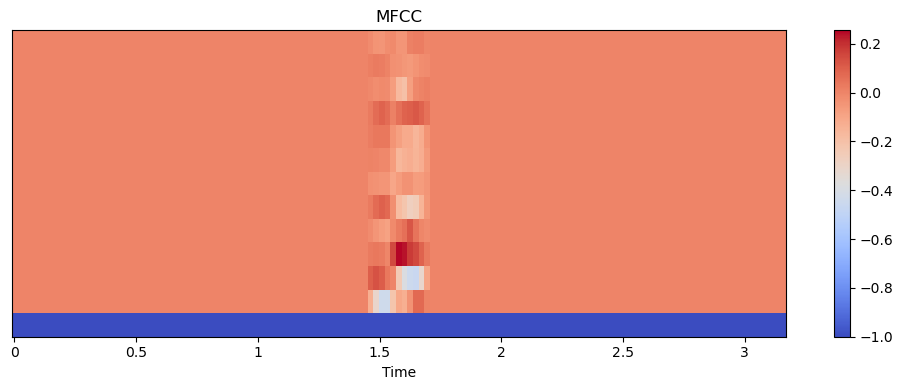

In [109]:
mfccs = extract_mfcc("cutAudioData_CityOnly/Data-1/City_1.wav")

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [110]:
data = pd.read_csv("data.csv")

nama = data["nama"]
error = data["error"]
path = data["path"]


In [111]:
correct_pronounciation = [1 if e == 0 else 0 for e in error]
path = ["cutAudioData_CityOnly/" + p for p in path]

mfccs = [extract_mfcc(p) for p in path]
mfccs_mean = [np.mean(m, axis=1) for m in mfccs]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (Random Forest in this example)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')